In [1]:
#Installing and Importing the necessary python libraries
!pip install yfinance pandas ta statsmodels
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import pandas as pd
import ta
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")

C:\Users\ssanj\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Fetching the data
data = yf.download("EURINR=X", start="2023-01-01", end="2024-09-30")

[*********************100%***********************]  1 of 1 completed


In [5]:
# Data Preprocessing - Filling null values
data['Close'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)

In [6]:
# Handling multi-index
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(col).strip() for col in data.columns.values]

In [8]:
# Changing datatype from object to numeric
data['Close EURINR=X'] = pd.to_numeric(data['Close EURINR=X'], errors='coerce')

In [15]:
# Finding the best arima model parameters
def best_arima_parameters(data, p_range, d_range, q_range):
    best_aic = float("inf")
    best_order = None
    
    # Iterate over all combinations of (p, d, q)
    for p, d, q in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(data['Close EURINR=X'], order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            
            # Check if the current model is better
            if aic < best_aic:
                best_aic = aic
                best_order = (p, d, q)
                
        except:
            continue

    return best_order


In [16]:
p = range(0, 10) 
d = range(0, 10)  
q = range(0, 10)  

best_order = best_arima_parameters(data, p, d, q)

In [36]:
# Function for using arima model
def fit_arima_and_forecast(data, steps):
    
    # Fit the ARIMA model with best parameters
    model = ARIMA(data, order=best_order)
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=steps)
    
    return forecast

In [39]:
# Forecasting for one day and one week
close_data = data['Close EURINR=X']
high_data = data['High EURINR=X']
low_data = data['Low EURINR=X']

# Forecast for one day
forecast_one_day_close = fit_arima_and_forecast(close_data, steps=1)
print(f"Forecasted Close value for one day: {forecast_one_day_close[0]}")

forecast_one_day_high = fit_arima_and_forecast(high_data, steps=1)
print(f"Forecasted High value for one day: {forecast_one_day_high[0]}")

forecast_one_day_low = fit_arima_and_forecast(low_data, steps=1)
print(f"Forecasted Low value for one day: {forecast_one_day_low[0]}")

# Forecast for one week (7 days)
forecast_one_week_close = fit_arima_and_forecast(close_data, steps=7)
print("Forecasted Close values for one week:")
print(forecast_one_week_close)

forecast_one_week_high = fit_arima_and_forecast(high_data, steps=7)
print("Forecasted High values for one week:")
print(forecast_one_week_high)

forecast_one_week_low = fit_arima_and_forecast(low_data, steps=7)
print("Forecasted Low values for one week:")
print(forecast_one_week_low)


Forecasted Close value for one day: 92.87886363366897
Forecasted High value for one day: 93.88088877277944
Forecasted Low value for one day: 92.31258404980395
Forecasted Close values for one week:
2024-09-30 00:00:00+00:00    92.878864
2024-10-01 00:00:00+00:00    92.898500
2024-10-02 00:00:00+00:00    92.168947
2024-10-03 00:00:00+00:00    91.384625
2024-10-04 00:00:00+00:00    90.138226
2024-10-07 00:00:00+00:00    88.316369
2024-10-08 00:00:00+00:00    86.095782
Freq: B, Name: predicted_mean, dtype: float64
Forecasted High values for one week:
2024-09-30 00:00:00+00:00    93.880889
2024-10-01 00:00:00+00:00    94.016557
2024-10-02 00:00:00+00:00    94.092128
2024-10-03 00:00:00+00:00    94.419058
2024-10-04 00:00:00+00:00    94.624010
2024-10-07 00:00:00+00:00    94.747776
2024-10-08 00:00:00+00:00    95.095151
Freq: B, Name: predicted_mean, dtype: float64
Forecasted Low values for one week:
2024-09-30 00:00:00+00:00    92.312584
2024-10-01 00:00:00+00:00    92.533786
2024-10-02 00:

In [40]:

# Create DataFrames for the one-day forecasted values
one_day_forecast = pd.DataFrame({
    'Close': [forecast_one_day_close[0]],
    'High': [forecast_one_day_high[0]],
    'Low': [forecast_one_day_low[0]]
})

# Create DataFrames for the one-week forecasted values
one_week_forecast = pd.DataFrame({
    'Close': forecast_one_week_close,
    'High': forecast_one_week_high,
    'Low': forecast_one_week_low
})

print("One Day Forecasted Values:")
print(one_day_forecast)

print("\nOne Week Forecasted Values:")
print(one_week_forecast)


One Day Forecasted Values:
       Close       High        Low
0  92.878864  93.880889  92.312584

One Week Forecasted Values:
                               Close       High        Low
2024-09-30 00:00:00+00:00  92.878864  93.880889  92.312584
2024-10-01 00:00:00+00:00  92.898500  94.016557  92.533786
2024-10-02 00:00:00+00:00  92.168947  94.092128  92.031325
2024-10-03 00:00:00+00:00  91.384625  94.419058  91.295902
2024-10-04 00:00:00+00:00  90.138226  94.624010  90.855094
2024-10-07 00:00:00+00:00  88.316369  94.747776  89.490407
2024-10-08 00:00:00+00:00  86.095782  95.095151  88.932765


In [43]:
# Calculating metrics

# Calculate Moving Average
moving_average_one_day = np.mean([forecast_one_day_close[0]])  # Only one value for one day
moving_average_one_week = np.mean(forecast_one_week_close)

# Calculate Bollinger Bands
std_dev_one_day = np.std([forecast_one_day_close[0]])  # Standard deviation for one value
std_dev_one_week = np.std(forecast_one_week_close)

upper_band_one_day = moving_average_one_day + (std_dev_one_day * 2)
lower_band_one_day = moving_average_one_day - (std_dev_one_day * 2)

upper_band_one_week = moving_average_one_week + (std_dev_one_week * 2)
lower_band_one_week = moving_average_one_week - (std_dev_one_week * 2)

# Calculate CCI
# For one-day CCI, using typical price approximation (only one value)
typical_price_one_day = (forecast_one_day_close[0] + forecast_one_day_high[0] + forecast_one_day_low[0]) / 3

# For one-week CCI, using the average typical price over the week
typical_price_one_week = (forecast_one_week_close + forecast_one_week_high + forecast_one_week_low) / 3  # Simplified for average over week

# Assuming we can only compute CCI for one week based on typical price
sma_one_week = np.mean(typical_price_one_week)  # Simple Moving Average
mad_one_week = np.mean(np.abs(typical_price_one_week - sma_one_week))  # Mean Absolute Deviation
cci_one_week = (typical_price_one_week - sma_one_week) / (0.015 * mad_one_week) if mad_one_week != 0 else 0

# For one-day CCI
sma_one_day = typical_price_one_day  # Simple Moving Average for one day
mad_one_day = np.abs(typical_price_one_day - sma_one_day)  # Mean Absolute Deviation for one day
cci_one_day = (typical_price_one_day - sma_one_day) / (0.015 * mad_one_day) if mad_one_day != 0 else 0

# Print Results
print("Metrics for One Day Forecast:")
print(f"Forecasted Close Value: {forecast_one_day_close[0]}")
print(f"Moving Average: {moving_average_one_day}")
print(f"Bollinger Bands: Upper = {upper_band_one_day}, Lower = {lower_band_one_day}")
print(f"Typical Price: {typical_price_one_day}")
print(f"MAD (Mean Absolute Deviation): {mad_one_day}")
print(f"CCI: {cci_one_day}")

print("\nMetrics for One Week Forecast:")
print(f"Forecasted Close Values: {forecast_one_week_close}")
print(f"Moving Average: {moving_average_one_week}")
print(f"Bollinger Bands: Upper = {upper_band_one_week}, Lower = {lower_band_one_week}")
print(f"Typical Price: {typical_price_one_week}")
print(f"MAD (Mean Absolute Deviation): {mad_one_week}")
print(f"CCI: {cci_one_week}")


Metrics for One Day Forecast:
Forecasted Close Value: 92.87886363366897
Moving Average: 92.87886363366897
Bollinger Bands: Upper = 92.87886363366897, Lower = 92.87886363366897
Typical Price: 93.02411215208411
MAD (Mean Absolute Deviation): 0.0
CCI: 0

Metrics for One Week Forecast:
Forecasted Close Values: 2024-09-30 00:00:00+00:00    92.878864
2024-10-01 00:00:00+00:00    92.898500
2024-10-02 00:00:00+00:00    92.168947
2024-10-03 00:00:00+00:00    91.384625
2024-10-04 00:00:00+00:00    90.138226
2024-10-07 00:00:00+00:00    88.316369
2024-10-08 00:00:00+00:00    86.095782
Freq: B, Name: predicted_mean, dtype: float64
Moving Average: 90.55447314018576
Bollinger Bands: Upper = 95.29066993955193, Lower = 85.8182763408196
Typical Price: 2024-09-30 00:00:00+00:00    93.024112
2024-10-01 00:00:00+00:00    93.149614
2024-10-02 00:00:00+00:00    92.764133
2024-10-03 00:00:00+00:00    92.366528
2024-10-04 00:00:00+00:00    91.872444
2024-10-07 00:00:00+00:00    90.851517
2024-10-08 00:00:00+0

In [46]:
# Decision Making Function
def make_decision(close_price, ma, bollinger_upper, bollinger_lower, cci):
    decision = []
    
    # Check for one-day forecast
    if close_price > ma:
        decision.append('BUY')
    elif close_price < ma:
        decision.append('SELL')
    
    if close_price > bollinger_upper:
        decision.append('SELL')
    elif close_price < bollinger_lower:
        decision.append('BUY')
    
    if cci > 100:
        decision.append('SELL')
    elif cci < -100:
        decision.append('BUY')
    else:
        decision.append('NEUTRAL')
    
    # Aggregate decision based on the majority
    if decision.count('BUY') > decision.count('SELL'):
        return 'BUY'
    elif decision.count('SELL') > decision.count('BUY'):
        return 'SELL'
    else:
        return 'NEUTRAL'



In [58]:
# Extract scalar values for CCI
cci_one_week_value = cci_one_week.iloc[-1]  
cci_one_day_value = cci_one_day  

# Extract scalar values from the Series for one day
moving_average_one_day_value = moving_average_one_day.iloc[0]  
upper_band_one_day_value = upper_band_one_day.iloc[0]  
lower_band_one_day_value = lower_band_one_day.iloc[0]  

# Extract scalar values for one week
moving_average_one_week_value = moving_average_one_week.iloc[-1]  
upper_band_one_week_value = upper_band_one_week.iloc[-1]  
lower_band_one_week_value = lower_band_one_week.iloc[-1]  

# Make decisions for one day
one_day_decision = make_decision(
    close_price=forecast_one_day_close[0],
    ma=moving_average_one_day_value,
    bollinger_upper=upper_band_one_day_value,
    bollinger_lower=lower_band_one_day_value,
    cci=cci_one_day_value
)

print(f"Decision for one-day forecast: {one_day_decision}")

# Make decisions for one week
one_week_decision = make_decision(
    close_price=forecast_one_week_close[-1],
    ma=moving_average_one_week_value,
    bollinger_upper=upper_band_one_week_value,
    bollinger_lower=lower_band_one_week_value,
    cci=cci_one_week_value.iloc[-1]
)

print(f"Decision for one-week forecast: {one_week_decision}")


Decision for one-day forecast: NEUTRAL
Decision for one-week forecast: NEUTRAL


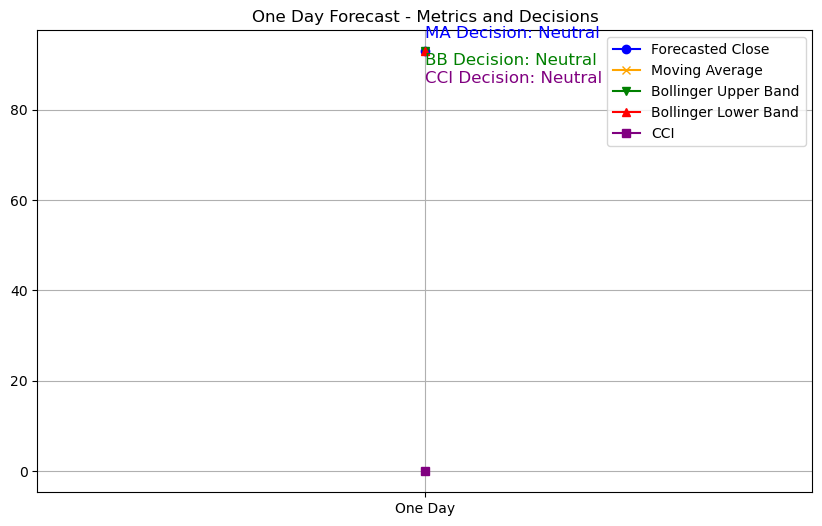

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
forecast_one_day_close = 92.878864
moving_average_one_day = 92.878864
upper_band_one_day = 92.878864
lower_band_one_day = 92.878864
cci_one_day = 0

# Updated Decision rule for one-day prediction
one_day_decision_updated = {
    "MA Decision": "Neutral",
    "BB Decision": "Neutral",
    "CCI Decision": "Neutral"
}

# One-Day Forecast Graph with Updated Decision Annotations and Increased Spacing
plt.figure(figsize=(10, 6))
plt.plot(['One Day'], [forecast_one_day_close], 'o-', label="Forecasted Close", color='blue')
plt.plot(['One Day'], [moving_average_one_day], 'x-', label="Moving Average", color='orange')
plt.plot(['One Day'], [upper_band_one_day], 'v-', label="Bollinger Upper Band", color='green')
plt.plot(['One Day'], [lower_band_one_day], '^-', label="Bollinger Lower Band", color='red')
plt.plot(['One Day'], [cci_one_day], 's-', label="CCI", color='purple')

# Adding Decisions as text annotations with increased spacing for clarity
plt.text(0, forecast_one_day_close + 3, f"MA Decision: {one_day_decision_updated['MA Decision']}", color='blue', fontsize=12)
plt.text(0, forecast_one_day_close - 3, f"BB Decision: {one_day_decision_updated['BB Decision']}", color='green', fontsize=12)
plt.text(0, forecast_one_day_close - 7, f"CCI Decision: {one_day_decision_updated['CCI Decision']}", color='purple', fontsize=12)

plt.title("One Day Forecast - Metrics and Decisions")
plt.legend()
plt.grid(True)
plt.savefig("one_day_forecast_spaced_decisions_graph.png")  # Save graph
plt.show()
